# importing needed libraries

In [61]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,make_scorer,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier

# reading and exploring the data

In [2]:
ddf = pd.read_csv(r"E:\python\csv files\diabetes_pred.csv")
ddf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
ddf['BMI'].describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

In [4]:
ddf['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [5]:
ddf = ddf[ddf['Insulin']!=0]
ddf = ddf[ddf['Glucose']!=0]
ddf['Insulin'].value_counts()

Insulin
105    11
130     9
140     9
120     8
94      7
       ..
178     1
127     1
510     1
16      1
112     1
Name: count, Length: 185, dtype: int64

<Axes: >

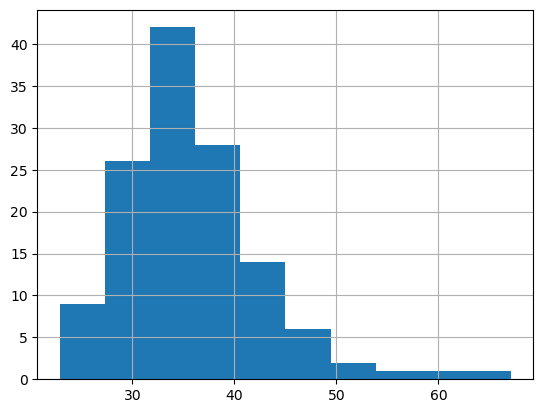

In [6]:
ddf_p = ddf[ddf['Outcome']==1]
ddf_n = ddf[ddf['Outcome']==0]
ddf_p['BMI'].hist()


<Axes: >

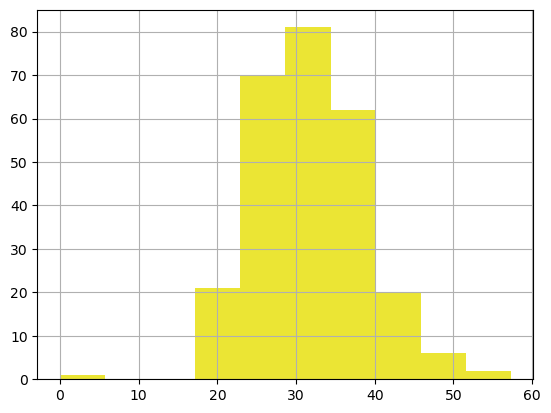

In [7]:
ddf_n['BMI'].hist(color='#ebe534')

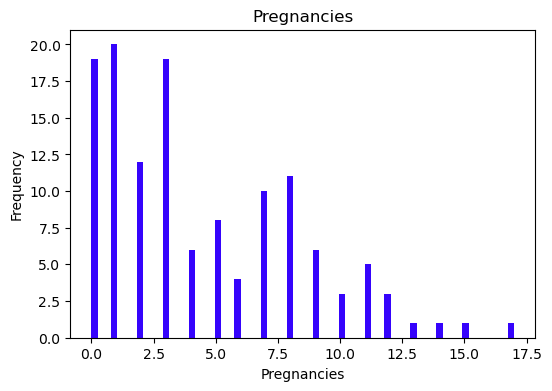

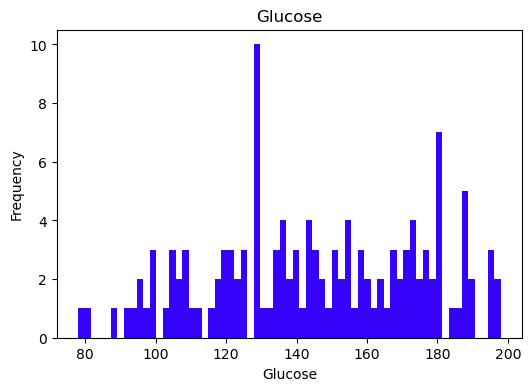

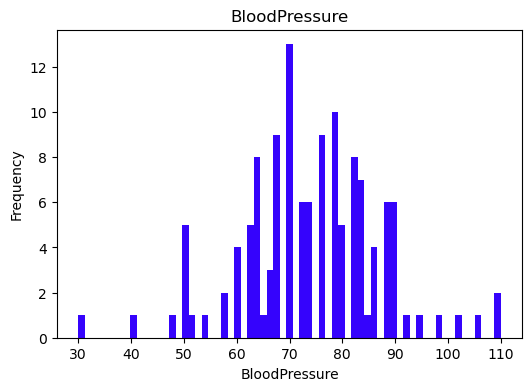

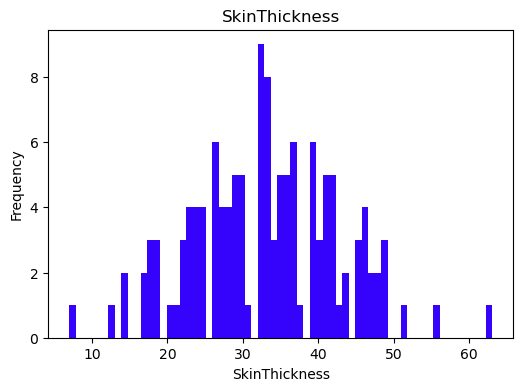

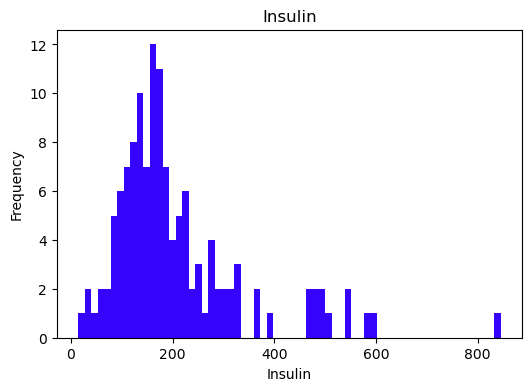

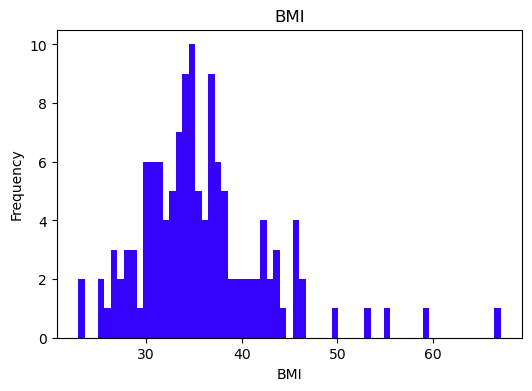

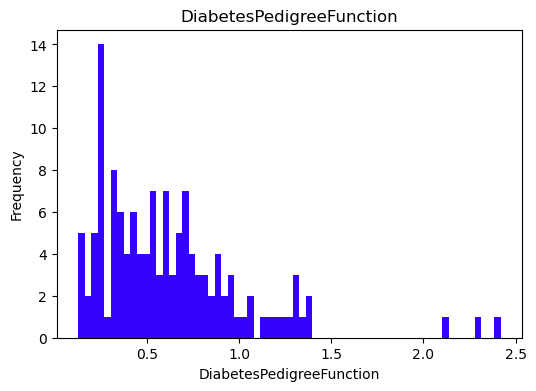

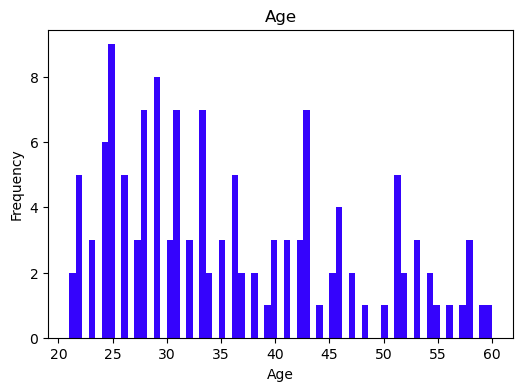

In [8]:
except_cols= ['Outcome']
for col in ddf_p.select_dtypes(include=['number']).columns:
    if col not in except_cols:
        plt.figure(figsize=(6,4)) 
        ddf_p[col].hist(bins=65, color='#3503fc')  
        plt.title(col)         
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show() 

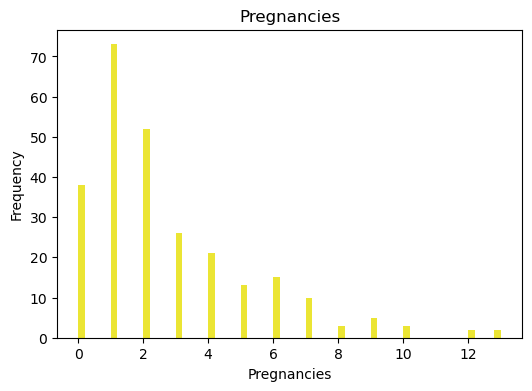

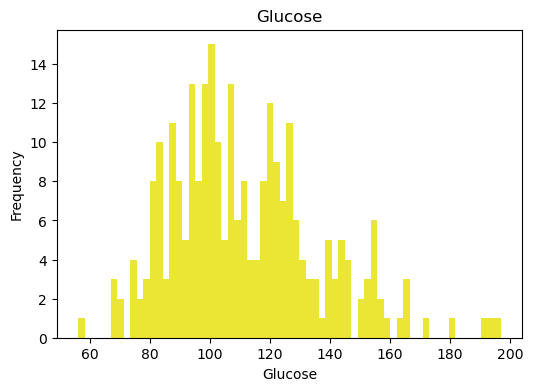

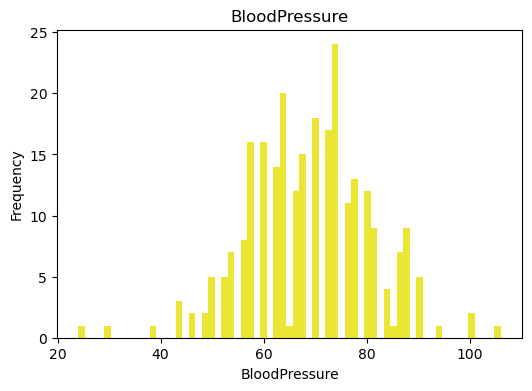

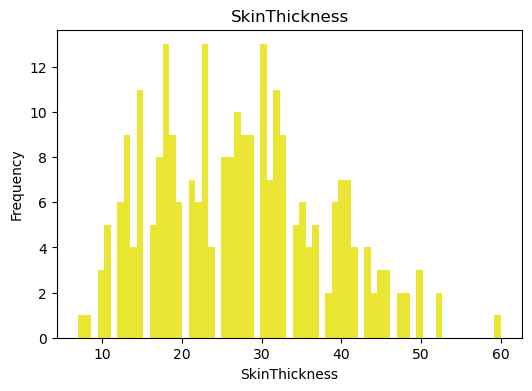

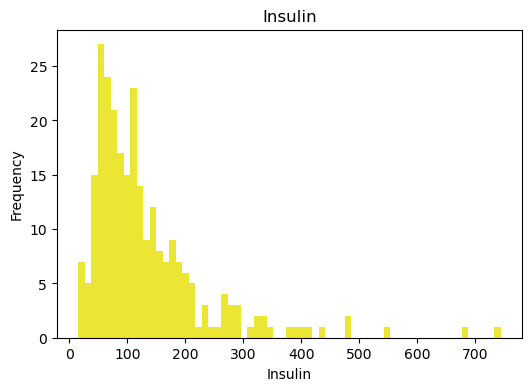

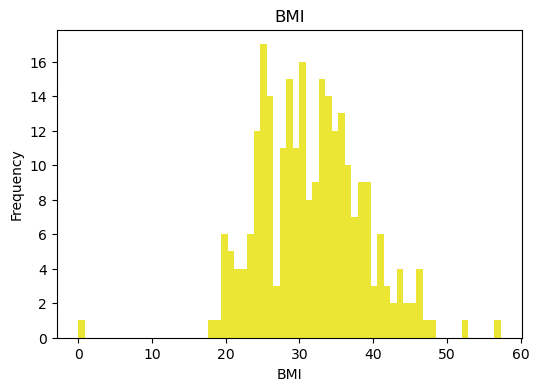

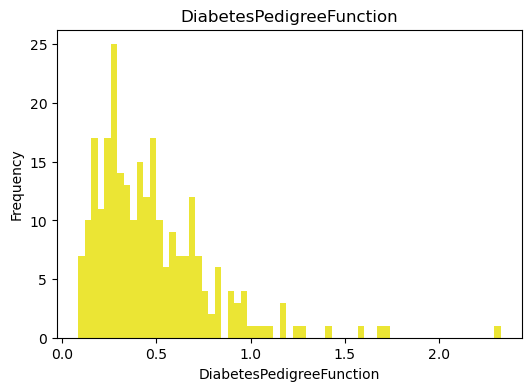

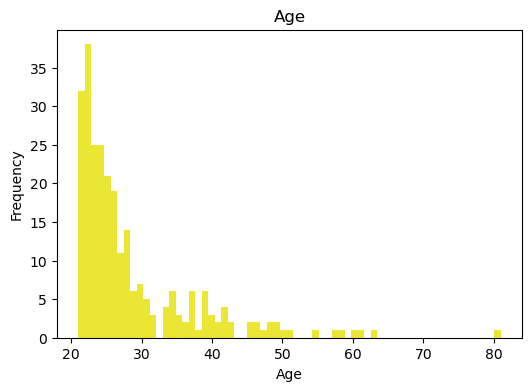

In [9]:
except_cols= ['Outcome']
for col in ddf_n.select_dtypes(include=['number']).columns:
    if col not in except_cols:
        plt.figure(figsize=(6,4)) 
        ddf_n[col].hist(bins=65, color='#ebe534')  
        plt.title(col)         
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show() 


PREGNANCIES
Mean: 4.47
Median: 3.00
Mode: 1.00


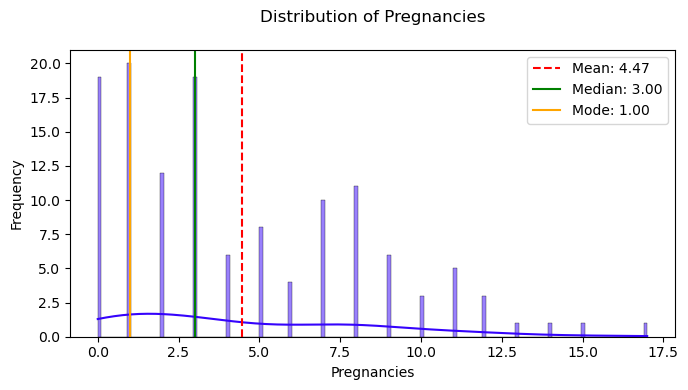


GLUCOSE
Mean: 145.19
Median: 144.50
Mode: 128.00


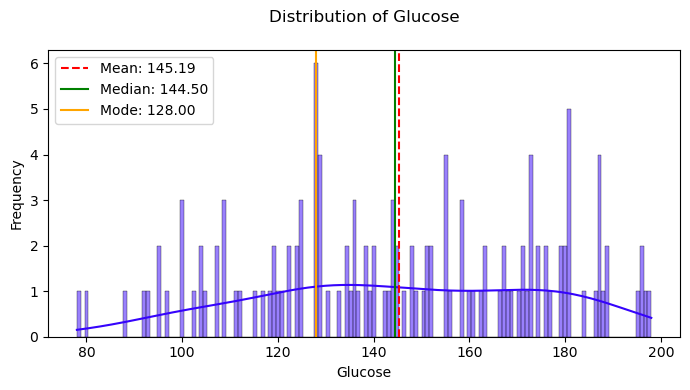


BLOODPRESSURE
Mean: 74.08
Median: 74.00
Mode: 70.00


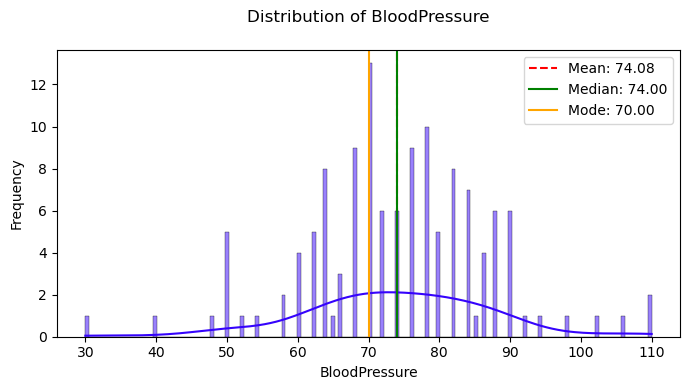


SKINTHICKNESS
Mean: 32.96
Median: 33.00
Mode: 32.00


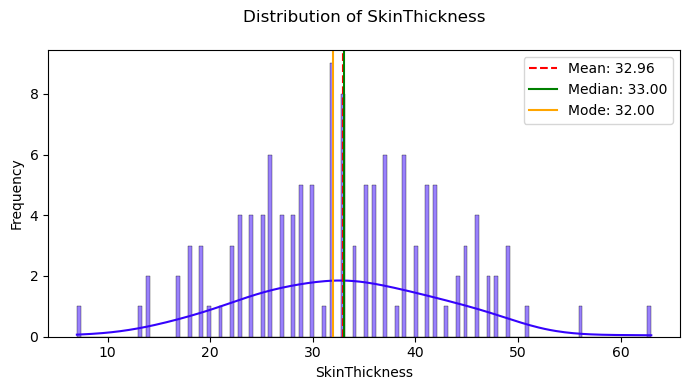


INSULIN
Mean: 206.85
Median: 169.50
Mode: 130.00


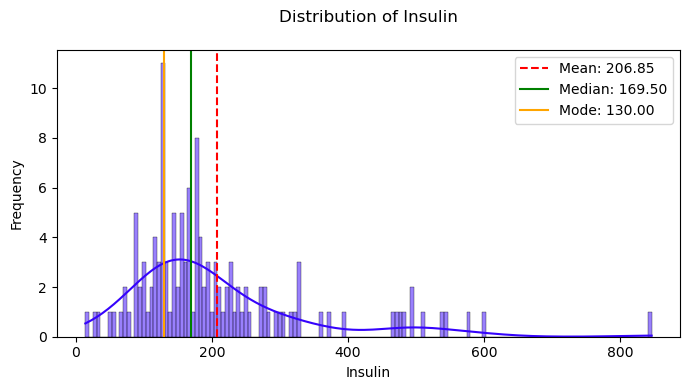


BMI
Mean: 35.78
Median: 34.60
Mode: 31.60


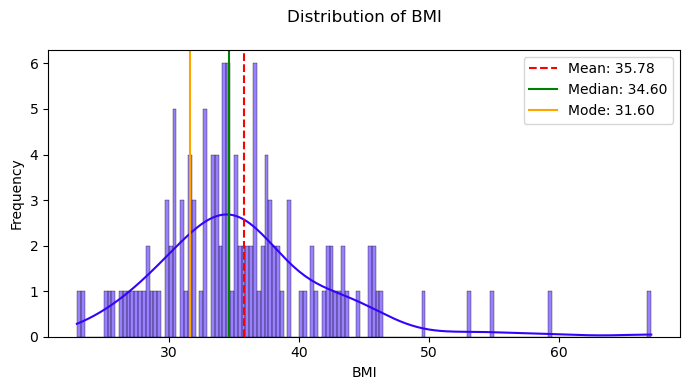


DIABETESPEDIGREEFUNCTION
Mean: 0.63
Median: 0.55
Mode: 0.25


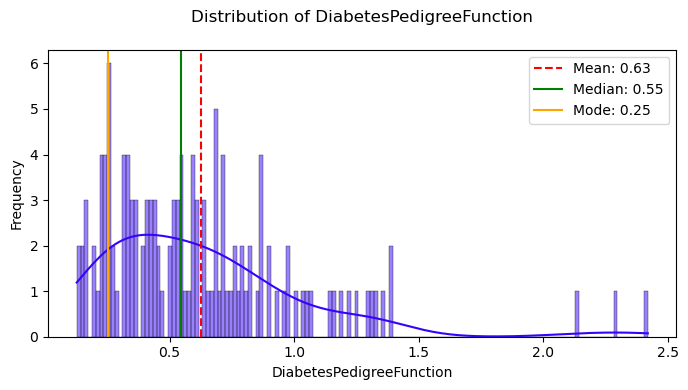


AGE
Mean: 35.94
Median: 33.00
Mode: 25.00


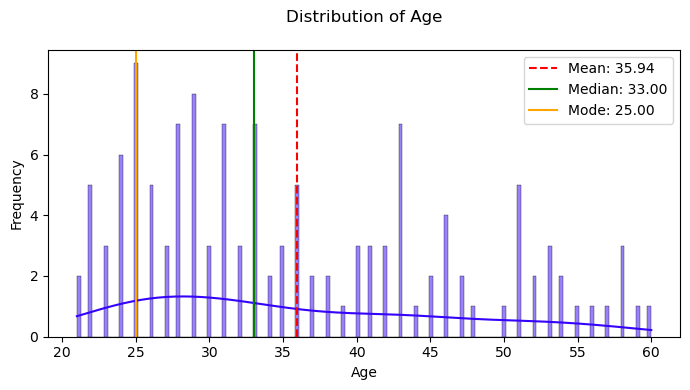

In [10]:
def analyze_numeric_columns(ddf_p, except_cols=[]):

    numeric_cols = [col for col in ddf_p.select_dtypes(include='number').columns 
                   if col not in except_cols]
    
    for column in numeric_cols:

        clean_data = ddf_p[column].dropna()
   
        stats = {
            'Mean': clean_data.mean(),
            'Median': clean_data.median(),
            'Mode': clean_data.mode()[0]  
        }
        

        print(f"\n{column.upper()}")
        for stat_name, value in stats.items():
            print(f"{stat_name}: {value:.2f}")
        
  
        create_distribution_plot(clean_data, column, stats)
        
def create_distribution_plot(data, column_name, statistics):
    """Helper function to create the distribution plot"""
    plt.figure(figsize=(7, 4))
    
  
    sns.histplot(data, bins=150, kde=True, color='#3503fc')
    

    colors = {'Mean': 'red', 'Median': 'green', 'Mode': 'orange'}
    linestyles = {'Mean': '--', 'Median': '-', 'Mode': '-'}
    
    for stat_name, value in statistics.items():
        plt.axvline(value, 
                   color=colors[stat_name], 
                   linestyle=linestyles[stat_name],
                   label=f"{stat_name}: {value:.2f}")
    

    plt.title(f'Distribution of {column_name}', pad=20)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


analyze_numeric_columns(ddf_p, except_cols=except_cols)

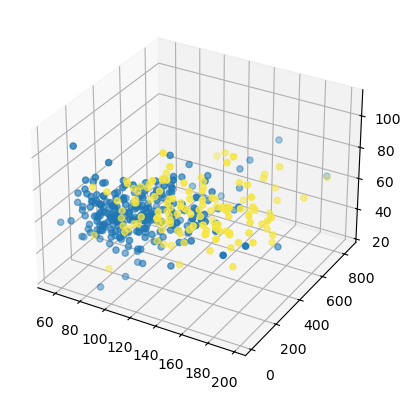

In [31]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(ddf_p['Glucose'],ddf_p['Insulin'],ddf_p['BloodPressure'],color='#f5e642')
ax.scatter(ddf_n['Glucose'],ddf_n['Insulin'],ddf_n['BloodPressure'])

# Normalization

In [32]:
x = ddf[['Pregnancies','Glucose','BloodPressure','SkinThickness' ,'Insulin', 'BMI',]]
y = ddf[['Outcome']]

In [46]:
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.71475619, -1.09202272, -0.37263571, -0.58411046, -0.52185718,
        -0.68034592],
       [-1.02651998,  0.46727761, -2.45784474,  0.55937851,  0.10215707,
         1.40148081],
       [-0.09122859, -1.44936238, -1.65584127,  0.27350627, -0.57245293,
        -0.27785942],
       [-0.40299239,  2.41640302, -0.05183432,  1.51228599,  3.26439143,
        -0.34725364],
       [-0.71475619,  2.15651963, -0.85383779, -0.58411046,  5.81947679,
        -0.40276902]])

In [49]:
nor_data = preprocessing.normalize(x)
nor_data[:5]

array([[-0.41837701, -0.63920706, -0.21811943, -0.34190454, -0.30546507,
        -0.39823523],
       [-0.33129787,  0.15080863, -0.79324196,  0.18053317,  0.03297005,
         0.45231229],
       [-0.03951364, -0.6277592 , -0.71719095,  0.11846318, -0.2479453 ,
        -0.12034865],
       [-0.09228794,  0.5533724 , -0.01187041,  0.34632357,  0.7475674 ,
        -0.0795234 ],
       [-0.11264707,  0.33987201, -0.13456662, -0.09205703,  0.91716172,
        -0.06347724]])

In [67]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y , test_size=0.3, random_state=4)

# classification

In [68]:
models_to_evaluate = [
    ("Logistic Regression", LogisticRegression(max_iter=2500)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest", RandomForestClassifier(n_estimators=16, max_depth=6, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=16, learning_rate=0.1, max_depth=3, random_state=42)),
    ("Support Vector Classifier", SVC(kernel='rbf', C=0.5, probability=True, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=10)),
    ("XGBoost", XGBClassifier(n_estimators=16,use_label_encoder=False, eval_metric='logloss', max_depth=3,random_state=42))
]

results = []

for name, model in models_to_evaluate:
   
    model.fit(x_train, y_train)
    
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test) 
    
    
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    results.append({
    "Model": name,
    "Accuracy (Train)": acc_train * 100,
    "Accuracy (Test)": acc_test * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1-Score": f1 * 100,
    })

E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
E:\anaconda\Lib\site-packages\sklearn\preprocessing\_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_

In [69]:
ddf_results = pd.DataFrame(results)
print(ddf_results.sort_values("Accuracy (Test)", ascending=False).to_string(index=False))

                    Model  Accuracy (Train)  Accuracy (Test)  Precision    Recall  F1-Score
      K-Nearest Neighbors         82.181818        78.813559  78.665591 78.813559 77.573021
Support Vector Classifier         82.181818        75.423729  74.629061 75.423729 74.536340
      Logistic Regression         78.545455        75.423729  75.032660 75.423729 75.176822
                  XGBoost         88.363636        73.728814  73.073894 73.728814 73.261045
            Decision Tree         82.545455        72.033898  70.814102 72.033898 69.634751
        Gradient Boosting         85.090909        72.033898  71.267537 72.033898 68.715886
            Random Forest         89.454545        69.491525  67.845036 69.491525 67.889190


# evaluating

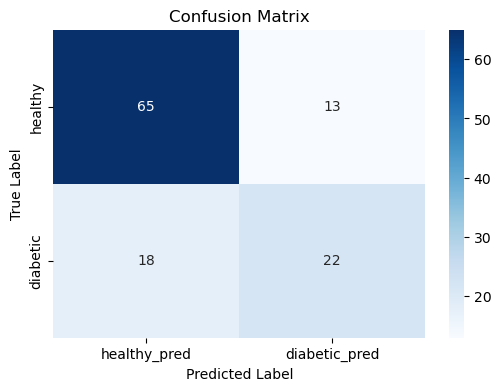

In [71]:
cm =confusion_matrix(y_test,y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['healthy_pred', 'diabetic_pred'],
            yticklabels=['healthy', 'diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Thank you all again.here is what all i could do on this dataset.
as always don't forget to help me get better

my github: